## Simple Linear Model for Predicting MNIST data

by Irwing Dsouza

### Introduction

We create a simple linear model using TensorFlow to predict handwritten digits in the MNIST data set

In [189]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [190]:
tf.__version__

'1.3.0'

## Load the Data

In [191]:
from tensorflow.examples.tutorials.mnist import input_data

In [192]:
data=input_data.read_data_sets("./MNIST_data/",one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


Check the Counts

In [193]:
print("Size of ")
print("1. Training Set  : ",len(data.train.labels))
print("2. Test Set      : ",len(data.test.labels))
print("3. Validaton Set : ",len(data.validation.labels))

Size of 
1. Training Set  :  55000
2. Test Set      :  10000
3. Validaton Set :  5000


The MNIST data set consists of 70,000 images split into the 3 parts as shown above

One hot encoding has been done on the data, where the lable has been converted into a vector of 1s and 0s of length 10 
where the presence of 1 in the ith place indicates the lable =i-1

for eg:

In [194]:
data.train.labels[1,:]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [195]:
#create a variable to hold the lables of the "true values from the test dataset
tru_val=np.array([label.argmax() for label in data.test.labels])

In [196]:
tru_val

array([7, 2, 1, ..., 4, 5, 6])

In [197]:
data.train.labels[1,:].argmax()

3

Here a 1 in the 4th column indicates the number in the image is (4-1) = 3


We prove this by viewing the image file

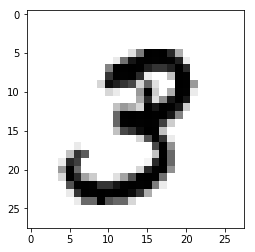

In [198]:
plt.imshow(data.train.images[1].reshape(28,28),cmap='binary')


Create a function to print images

In [199]:
def draw_imgs(imgs,predicted=None,tru_val=None):
    fig, axes = plt.subplots(3, 3)
    for i,ax in enumerate(axes.flat):
        ax.imshow(imgs[i].reshape(28,28), cmap='binary')        
        ax.set_xticks([])
        ax.set_yticks([])
        
        if predicted is None:
            xlabel = "True Value: {0}".format(tru_val[i])
        else:
            xlabel = "True Value: {0}, \n Predicted: {1}".format(tru_val[i], predicted[i])
        
        ax.set_xlabel(xlabel)
        plt.tight_layout()


Lets check what the 1st 9 handwritten images in the test set are

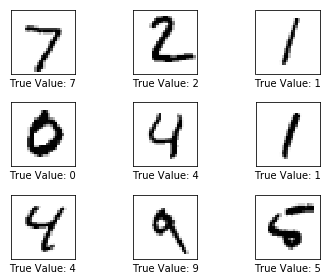

In [200]:
draw_imgs(data.test.images[0:9],tru_val=tru_val)



We now actually start using Tensorflow to do our predictions




## Placeholders

Placeholders are "variables" that serve as an input to the TensorFlow graph that changes as the graph is executed, this is known as "feeding" the graph. we first define the input images as placehoders.

In [201]:
x=tf.placeholder(tf.float32,[None,784])

Here the shape given for x is None x 784, this is because :

None -> we are going to feed in the i/p in batches

784 -> images are of size 28x28 =784 which has been flattened

In [202]:
y_true=tf.placeholder(tf.float32,[None,10])

Here we have diemnsions of None x 10 because

None -> we have batches

10 -> we have 10 classes

## Variables

Variables are what tensorflow tweaks to optimise the model , in this case since we are doing a simple linear fit, we only have 2 variables the weight and the bias

In [203]:
weights=tf.Variable(tf.zeros([784,10]))

We initialised the weight to 784 (for the same reason as earlier) by 10 for the 10 classes

In [204]:
biases=tf.Variable(tf.zeros([10]))

we need one bias term for each class

## Model

In [205]:
Y=tf.matmul(x,weights)+biases

Once the above model is evalutaed it will return a 10 column matrix with one row for each class, where each column is an estimate of how likely that Y is to belong to that class. Since this o/p is a little difficult to interpret we use the softmax function , a commonly used function in multi variate classification to normalise it 

In [206]:
y_pred = tf.nn.softmax(Y)

The predicted class can be calculated from the y_pred matrix by taking the index of the largest element in each row.

In [207]:
y_pred_class=tf.argmax(y_pred,1)

## Cost function and its optimisation

During the early phase of training out network won't really be able to give the "correct" answer hence the need for training.During training we provide it both the features as well as the classes/lables/"correct answers" As it trains it (hopefully!) gets better at predicting and the answers come closer and closer to the actual "correct" value.

How we measure how close it is to the "correct" value is given by a cost function. Ultimately we want the network to give as correct answers as possible, i.e. the cost has to be as close to zero as possible.

Cross entropy is a performance measure used in classification problems, for a perfect prediction i.e.

predicted value = actual value

the cross entropy is zero.

Our aim during optimisation is thus to reduce cross entropy to a value as close to zero as possible. For this we use a built in TF algorithm to calculate cross entropy which also internally calculates softmax

In [208]:
cross_entropy=tf.nn.softmax_cross_entropy_with_logits(logits=Y,labels=y_true)

We have the cross entropy now ,but we need it reduced to a single scalar to use it in any meaningful way and so we just take the average or mean cross entropy across all image classifications

In [209]:
cost=tf.reduce_mean(cross_entropy)

## Optimisation method

To optimise the cost function as described earlier we use the Gradient Descent algorithm. In overly simplified terms the way this works is by taking small steps (called the learning rate) to to gradually "descend" to the minimum cost

In [210]:
optimiser=tf.train.GradientDescentOptimizer(learning_rate=0.5,).minimize(cost)

## Create a Tensor Flow Session

In [211]:
init=tf.global_variables_initializer()
tf_batch_size=100

Accuracy is:
0.919

1st nine predicted values are


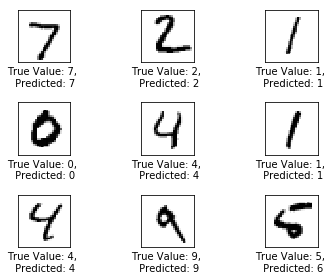

In [212]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x,batch_y=data.train.next_batch(tf_batch_size)
        
        sess.run(optimiser,feed_dict={x:batch_x,y_true:batch_y})
        
    # Run the model against the test data check how accurate it is
    matches = tf.equal(y_pred_class,tf.argmax(y_true,1))
            
    acc=tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print("Accuracy is:")
    print(sess.run(acc,feed_dict={x:data.test.images,y_true:data.test.labels}))
    prediction=sess.run(y_pred_class,feed_dict={x:data.test.images})
    print()
    print("1st nine predicted values are")
    draw_imgs(data.test.images[0:9],predicted=prediction[0:9],tru_val=tru_val)

## Sample wrong predictions

It would be interesting to see some incorrect predictions, which is what we do next

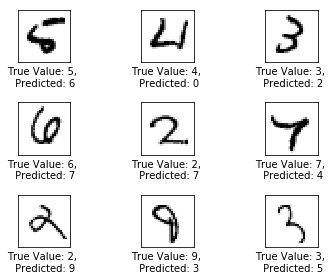

In [213]:
correct_predictions=(prediction==tru_val)
incorrect_predictions = (correct_predictions == False)
 
#Get the images that have been incorrectly predicted
incorrect_pred_images = data.test.images[incorrect_predictions]
    
#Get the incorrectly predicted classes
incorrect_classes=prediction[incorrect_predictions]
    
#Get the right classes for the incorrect predictions
right_cls_incorr=tru_val[incorrect_predictions]
  
draw_imgs(incorrect_pred_images,predicted=incorrect_classes,tru_val=right_cls_incorr)